In [ ]:
# Essential libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Mounted at ./content/gdrive


In [ ]:
DATADIR = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_64"

In [ ]:
# List of categories

# 0 for abnormal masks
# 1 for normal masks

CATEGORIES = ["abnormal_resize64", "normal_resize64"]

In [ ]:
# to read and show one image from the datadir and joining its path to the category
# testing the loaded directory

#for category in CATEGORIES:
 #   path = os.path.join(DATADIR, category)
#path = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_64/abnormal_resize64"
path = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_64/abnormal_resize64"

#/content/gdrive/MyDrive/Gait_analysis/all_fixed/abnormal_resized/abnormal_resized150
folder = os.listdir(path)
for img in os.listdir(path):
  img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array, cmap = "gray")
  plt.show()
  break
#break 

In [ ]:
img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
img_array.shape

(64, 64)

In [ ]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
train_data = []
labels = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            #new_array = img_array.flatten()
            train_data.append(new_array)
            
            if "abnormal_resize64" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass



In [ ]:
create_train_data()

In [ ]:
print(len(train_data))
print(len(labels))

286
286


In [ ]:
np.shape(train_data)

(286, 64, 64)

In [ ]:
train_data = np.array(train_data)
labels = np.array(labels)

In [ ]:
train_data.shape

(286, 64, 64)

<Figure size 432x288 with 0 Axes>

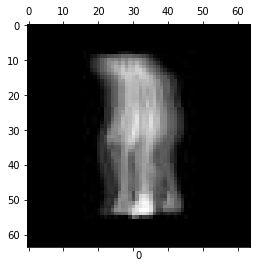

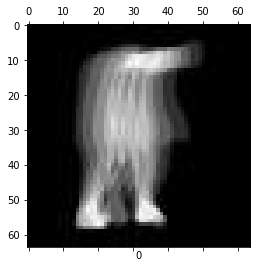

In [ ]:
# lets view some images from the training_data with their labels.
# The images are not shuffled yet. 

plt.gray()
for i in range(3,7):
    plt.matshow(train_data[i])
    plt.xlabel(labels[i])

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, random_state = 0)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

214
214
72
72


In [ ]:
X_train.shape

(214, 64, 64)

In [ ]:
y_train.shape

(214,)

In [ ]:
plt.matshow(X_train[9])

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 64, 64, 1)
X_test_flattened = X_test.reshape(len(X_test), 64, 64, 1)

In [ ]:
X_train_flattened.shape

(214, 64, 64, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [ ]:
train_Y_one_hot.shape

(214, 2)

In [ ]:
#trying to interchange the columns

#test10 = train_Y_one_hot[:, np.argsort(train_Y_one_hot.diagonal() * -1)]

In [ ]:
y_train[0:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
train_Y_one_hot[0:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test[0:10]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
test_Y_one_hot[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
def plot_sample(train_data, labels, index):
    plt.figure(figsize = (15,2))
    plt.imshow(train_data[index])
    plt.xlabel(CATEGORIES[labels[index]])

In [ ]:
CATEGORIES

['abnormal_resize64', 'normal_resize64']

In [ ]:
plot_sample(X_test, y_test, 0)

MODEL BUILDING

In [ ]:
import tensorflow
import keras.models

from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Activation

Model without any dropout or batch normalization

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(64, (3,3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
tensorflow.config.run_functions_eagerly(True)

model.fit(X_train_flattened, train_Y_one_hot, epochs=8)

Epoch 1/8
7/7 [==============================] - 2s 284ms/step - loss: 70.9431 - accuracy: 0.5280
Epoch 2/8
7/7 [==============================] - 2s 278ms/step - loss: 1.6182 - accuracy: 0.7710
Epoch 3/8
7/7 [==============================] - 2s 278ms/step - loss: 0.4353 - accuracy: 0.8178
Epoch 4/8
7/7 [==============================] - 2s 282ms/step - loss: 0.2603 - accuracy: 0.9065
Epoch 5/8
7/7 [==============================] - 2s 277ms/step - loss: 0.1985 - accuracy: 0.9252
Epoch 6/8
7/7 [==============================] - 2s 277ms/step - loss: 0.1301 - accuracy: 0.9486
Epoch 7/8
7/7 [==============================] - 2s 278ms/step - loss: 0.0771 - accuracy: 0.9626
Epoch 8/8
7/7 [==============================] - 2s 313ms/step - loss: 0.0458 - accuracy: 0.9860


In [ ]:
test_loss, test_acc = model.evaluate(X_test_flattened , test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(X_test_flattened)
#print(np.argmax(np.round(predictions[0])))

#plt.imshow(X_test_flattened[0].reshape(64, 64), cmap = plt.cm.binary)
#plt.show()

3/3 [==============================] - 0s 75ms/step - loss: 0.2565 - accuracy: 0.9444
Test loss 0.256481796503067
Test accuracy 0.9444444179534912


In [ ]:
y_test[0:10]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
predictions[0:10]

array([[0.7840365 , 0.40561324],
       [0.10488111, 0.87667954],
       [0.80441415, 0.26108426],
       [0.26279372, 0.7868316 ],
       [0.04027209, 0.9497111 ],
       [0.9200474 , 0.18204087],
       [0.85830605, 0.2261115 ],
       [0.7781851 , 0.32076377],
       [0.5569765 , 0.46554992],
       [0.74012476, 0.32676783]], dtype=float32)

In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
y_pred[0:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
test_Y_one_hot[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
y_pred[0:10]     # predicted labels for the test set

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
y_true = np.argmax(test_Y_one_hot, axis=1)      # conversion   y_test  ==>  test_Y_one_hot  ==>  y_true

In [ ]:
y_true[0:10]    # which is the same as y_test. 

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
# Let's view the confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix

cm = sklearn.metrics.confusion_matrix(y_true, y_pred)

#cm1 = confusion_matrix(y_test, model.predict(X_test))
cm

array([[29,  2],
       [ 2, 39]])

In [ ]:
import matplotlib.pyplot as plt

CM = confusion_matrix(y_true,y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5,5))
plt.show()

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, pos_label=0)

0.9354838709677419

In [ ]:
sensitivity = sklearn.metrics.recall_score(y_true , y_pred)
sensitivity

0.9512195121951219

In [ ]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_pred))
specificity

0.9354838709677419

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [ ]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

0.9354838709677419
0.9512195121951219
0.9512195121951219
0.9512195121951219


Model using Dropout and tweaking some hyperparameters

In [ ]:
import tensorflow
import keras.models
import keras,os
from keras.models import Sequential

from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten


#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Activation
#from keras.layers import Conv2D, MaxPooling2D


#from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
model1 = keras.models.Sequential()

model1.add(Conv2D(64, (3,3), input_shape=(64, 64, 1)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(64))

model1.add(Dense(2))
model1.add(Activation('softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 29, 29, 64)        0         
                                                      

In [ ]:
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
hi = model1.fit(X_train_flattened, train_Y_one_hot, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


7/7 [==============================] - 3s 381ms/step - loss: 65.3716 - accuracy: 0.6075
Epoch 2/10
7/7 [==============================] - 3s 393ms/step - loss: 7.0393 - accuracy: 0.7150
Epoch 3/10
7/7 [==============================] - 3s 385ms/step - loss: 0.5402 - accuracy: 0.9159
Epoch 4/10
7/7 [==============================] - 3s 356ms/step - loss: 0.3124 - accuracy: 0.8972
Epoch 5/10
7/7 [==============================] - 3s 365ms/step - loss: 0.2316 - accuracy: 0.9065
Epoch 6/10
7/7 [==============================] - 3s 353ms/step - loss: 0.1894 - accuracy: 0.9299
Epoch 7/10
7/7 [==============================] - 3s 364ms/step - loss: 0.1584 - accuracy: 0.9579
Epoch 8/10
7/7 [==============================] - 3s 373ms/step - loss: 0.1627 - accuracy: 0.9486
Epoch 9/10
7/7 [==============================] - 2s 349ms/step - loss: 0.1203 - accuracy: 0.9579
Epoch 10/10
7/7 [==============================] - 3s 360ms/step - loss: 0.1143 - accuracy: 0.9673


3/3 [==============================] - 0s 81ms/step - loss: 0.1880 - accuracy: 0.9444
Test loss 0.18802686035633087
Test accuracy 0.9444444179534912
0


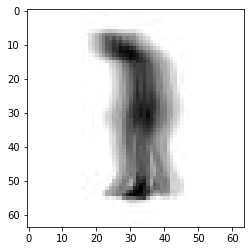

In [ ]:
test_loss, test_acc = model1.evaluate(X_test_flattened , test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions1 = model1.predict(X_test_flattened)
print(np.argmax(np.round(predictions1[0])))

plt.imshow(X_test_flattened[0].reshape(64, 64), cmap = plt.cm.binary)
plt.show()

In [ ]:
y_pred1 = np.argmax(predictions1, axis=1)

In [ ]:
# no need
#y_true1 = np.argmax(test_Y_one_hot, axis=1)

In [ ]:
y_true

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0])

In [ ]:
y_pred1

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0])

In [ ]:
# Let's view the confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix

cm = sklearn.metrics.confusion_matrix(y_true, y_pred1)

#cm1 = confusion_matrix(y_test, model.predict(X_test))
cm

array([[29,  2],
       [ 2, 39]])

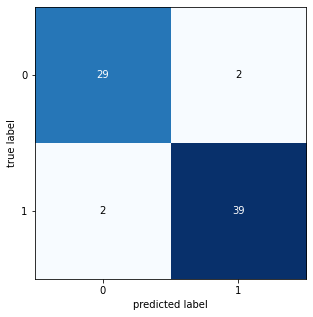

In [ ]:
import matplotlib.pyplot as plt

CM = confusion_matrix(y_true,y_pred1)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5,5))
plt.show()

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred1, pos_label=0)

0.9354838709677419

In [ ]:
sensitivity = sklearn.metrics.recall_score(y_true , y_pred1)
sensitivity

0.9512195121951219

In [ ]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_pred1))
specificity

0.9354838709677419

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [ ]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

0.9444444444444444
1.0
0.9428571428571428
1.0


In [ ]:
hi.history

In [ ]:
hi_acc = [elemt*100 for elemt in hi.history["accuracy"]]

In [ ]:
hi_acc

[57.94392228126526,
 79.43925261497498,
 79.90654110908508,
 85.5140209197998,
 91.58878326416016,
 87.85046935081482,
 91.58878326416016,
 94.85981464385986,
 96.26168012619019,
 93.45794320106506]

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(hi.history["accuracy"])
plt.plot(hi_acc)
plt.plot(hi.history["loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Loss"])
plt.show()

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1])

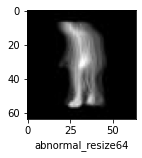

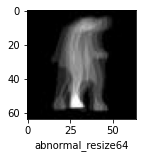

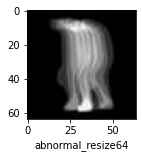

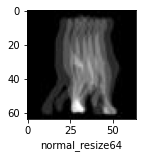

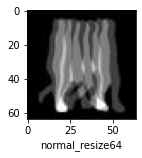

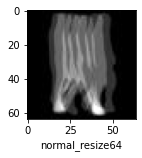

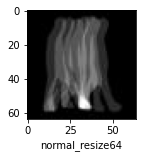

In [ ]:
# predicted labels for the model 

for i in range(10):
  plot_sample(X_test, y_pred, i)

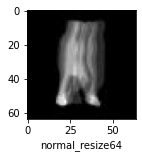

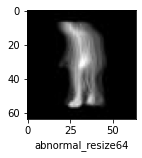

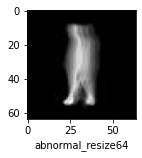

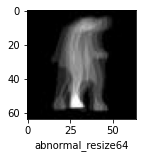

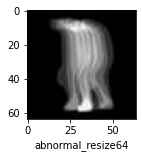

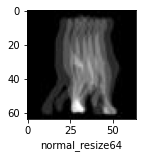

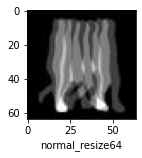

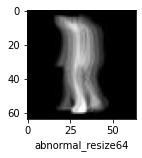

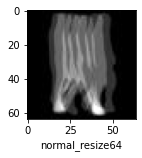

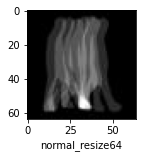

In [ ]:
# predicted labels for the model1

for i in range(10):
  plot_sample(X_test, y_pred1, i)

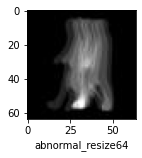

In [ ]:
plot_sample(X_test, y_true1, 0)

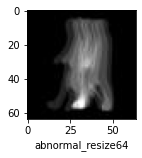

In [ ]:
plot_sample(X_test, y_test, 0)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, pos_label=0)

0.9444444444444444

In [ ]:
sensitivity = sklearn.metrics.recall_score(y_true , y_pred)
sensitivity

1.0

In [ ]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_pred))
specificity

0.9444444444444444

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [ ]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

0.9444444444444444
1.0
0.9428571428571428
1.0
